In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from nltk.corpus import names
from collections import defaultdict
import os,re
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D,Conv1D, MaxPooling1D,GlobalMaxPooling1D, Input,Dropout, Embedding
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical, np_utils
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.initializers import Constant
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score,classification_report
from keras import optimizers
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_val = pd.read_csv('val.csv')

In [3]:
df_train_pos = pd.read_csv('Data/train_pos.csv')
df_test_pos = pd.read_csv('Data/test_pos.csv')
df_val_pos = pd.read_csv('Data/val_pos.csv')

In [4]:
# df_list = [df_train,df_test,df_val]
# for df in df_list:
#     df.astype({'target': 'int32'}).dtypes

In [5]:
X_train, y_train = df_train['preprocessed_text'], df_train['target']
X_test, y_test = df_test['preprocessed_text'], df_test['target']
X_val, y_val = df_val['preprocessed_text'], df_val['target']

In [6]:
X_train_pos, y_train_pos = df_train_pos['lemmatized_and_pos'], df_train_pos['target']
X_test_pos, y_test_pos = df_test_pos['lemmatized_and_pos'], df_test_pos['target']
X_val_pos, y_val_pos = df_val_pos['lemmatized_and_pos'], df_val_pos['target']

In [7]:
# Using TFidf Vectorizer 
tfidfV = TfidfVectorizer(min_df = 10) 


# Data  for Neural Networks
X_train_tfidf = tfidfV.fit_transform(df_train.preprocessed_text)
y_train_nn = to_categorical(df_train.target, num_classes=20)
y_val_nn = to_categorical(df_val.target, num_classes=20)
X_val_tfidf = tfidfV.transform(df_val.preprocessed_text)
X_test_tfidf = tfidfV.transform(df_test.preprocessed_text)
y_test_nn = to_categorical(df_test.target, num_classes=20)

In [8]:
# Using TFidf Vectorizer 
tfidf = TfidfVectorizer(min_df = 10) 


# Data  for Neural Networks
X_train_tfidf_pos = tfidf.fit_transform(df_train_pos.lemmatized_and_pos)
y_train_nn_pos = to_categorical(df_train_pos.target, num_classes=20)
y_val_nn_pos = to_categorical(df_val_pos.target, num_classes=20)
X_val_tfidf_pos = tfidf.transform(df_val_pos.lemmatized_and_pos)
X_test_tfidf_pos = tfidf.transform(df_test_pos.lemmatized_and_pos)
y_test_nn_pos = to_categorical(df_test_pos.target, num_classes=20)

In [9]:
X_train_tfidf_pos.shape[1]

20579

In [10]:
# Defining the model
model1 = Sequential()
model1.add(Dense(1500, input_dim=X_train_tfidf.shape[1], activation='relu'))
model1.add(Dense(20, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True)

# fitting the model.
m1 = model1.fit(X_train_tfidf, y_train_nn, batch_size=32, epochs=500, callbacks=[esc, cp], validation_data=(X_val_tfidf,y_val_nn))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 10287 samples, validate on 3430 samples
Epoch 1/500
10287/10287 [==============================] - 6s 562us/step - loss: 1.4965 - accuracy: 0.6386 - val_loss: 0.8894 - val_accuracy: 0.7397

Epoch 00001: val_accuracy improved from -inf to 0.73965, saving model to initial_model.hdf5
Epoch 2/500
10287/10287 [==============================] - 6s 539us/step - loss: 0.3712 - accuracy: 0.9052 - val_loss: 0.8892 - val_accuracy: 0.7382

Epoch 00002: val_accuracy did not improve from 0.73965
Epoch 3/500
10287/10287 [==============================] - 6s 540us/step - loss: 0.1053 - accuracy: 0.9814 - val_loss: 0.9380 - val_accuracy: 0.7283

Epoch 00003: val_accuracy did not improve from 0.73965
Epoch 4/500
10287/10287 [==============================] - 5s 535us/step - loss: 0.0410 - accuracy: 0.9948 - val_loss: 0.9861 - val_accuracy: 0.7233

Epoch 00004: val_accuracy did not improve from 0.73965
Epoch 5/500


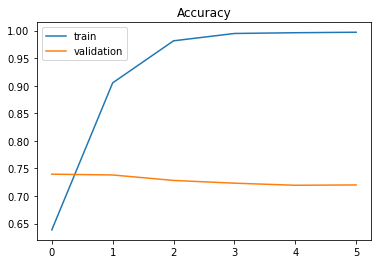

In [11]:
# Training Accuracy History
plt.title('Accuracy')
plt.plot(m1.history['accuracy'], label='train')
plt.plot(m1.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

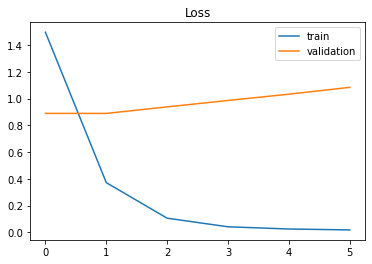

In [12]:
# Training Loss History
plt.title('Loss')
plt.plot(m1.history['loss'], label='train')
plt.plot(m1.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [13]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1500)              11829000  
_________________________________________________________________
dense_2 (Dense)              (None, 20)                30020     
Total params: 11,859,020
Trainable params: 11,859,020
Non-trainable params: 0
_________________________________________________________________


In [14]:
X_train_tfidf_pos.shape

(10600, 20579)

In [15]:
#same model but with pos_tags for comparison

# Defining the model
model2 = Sequential()
model2.add(Dense(2000, input_dim=X_train_tfidf_pos.shape[1], activation='relu'))
model2.add(Dense(20, activation='softmax'))

adam = optimizers.adam(learning_rate = 0.00001)
model2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="initial_model_pos.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True)

# fitting the model.
m2 = model2.fit(X_train_tfidf_pos, y_train_nn_pos, batch_size=32, epochs=500, callbacks=[esc, cp], validation_data=(X_val_tfidf_pos,y_val_nn_pos))

Train on 10600 samples, validate on 3534 samples
Epoch 1/500
10600/10600 [==============================] - 17s 2ms/step - loss: 2.9805 - accuracy: 0.3542 - val_loss: 2.9632 - val_accuracy: 0.5971

Epoch 00001: val_accuracy improved from -inf to 0.59706, saving model to initial_model_pos.hdf5
Epoch 2/500
10600/10600 [==============================] - 16s 2ms/step - loss: 2.9321 - accuracy: 0.7613 - val_loss: 2.9115 - val_accuracy: 0.7193

Epoch 00002: val_accuracy improved from 0.59706 to 0.71930, saving model to initial_model_pos.hdf5
Epoch 3/500
10600/10600 [==============================] - 16s 2ms/step - loss: 2.8580 - accuracy: 0.8289 - val_loss: 2.8336 - val_accuracy: 0.7496

Epoch 00003: val_accuracy improved from 0.71930 to 0.74958, saving model to initial_model_pos.hdf5
Epoch 4/500
10600/10600 [==============================] - 16s 2ms/step - loss: 2.7578 - accuracy: 0.8408 - val_loss: 2.7358 - val_accuracy: 0.7668

Epoch 00004: val_accuracy improved from 0.74958 to 0.76684, s

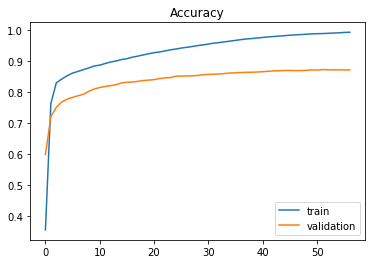

In [16]:
# Training Accuracy History
plt.title('Accuracy')
plt.plot(m2.history['accuracy'], label='train')
plt.plot(m2.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

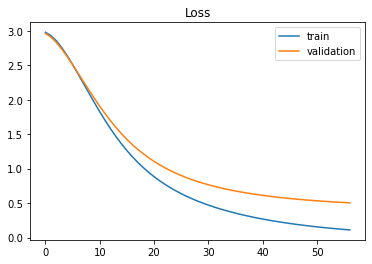

In [17]:
# Training Loss History
plt.title('Loss')
plt.plot(m2.history['loss'], label='train')
plt.plot(m2.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [18]:
pred_test = model2.predict_classes(X_test_tfidf_pos)


In [19]:
pred_test[1]

2

In [20]:
y_test_pos.shape

(4712,)

In [21]:
accuracy = accuracy_score(y_test_pos, pred_test)
accuracy

0.858446519524618

In [22]:
model2.evaluate(X_test_tfidf_pos,y_test_nn_pos)[1]

4712/4712 [==============================] - 1s 191us/step


0.8584465384483337

In [23]:
%store -r target_name_dict

In [24]:
accuracy = make_scorer(accuracy_score)

precision = make_scorer(precision_score, average='macro')
recall =  make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')
scoring={'precision':precision,'recall':recall,'f1':f1}

accuracy:  0.8584
f1_score: 0.8584
precision_score: 0.8584
recall_score: 0.8584


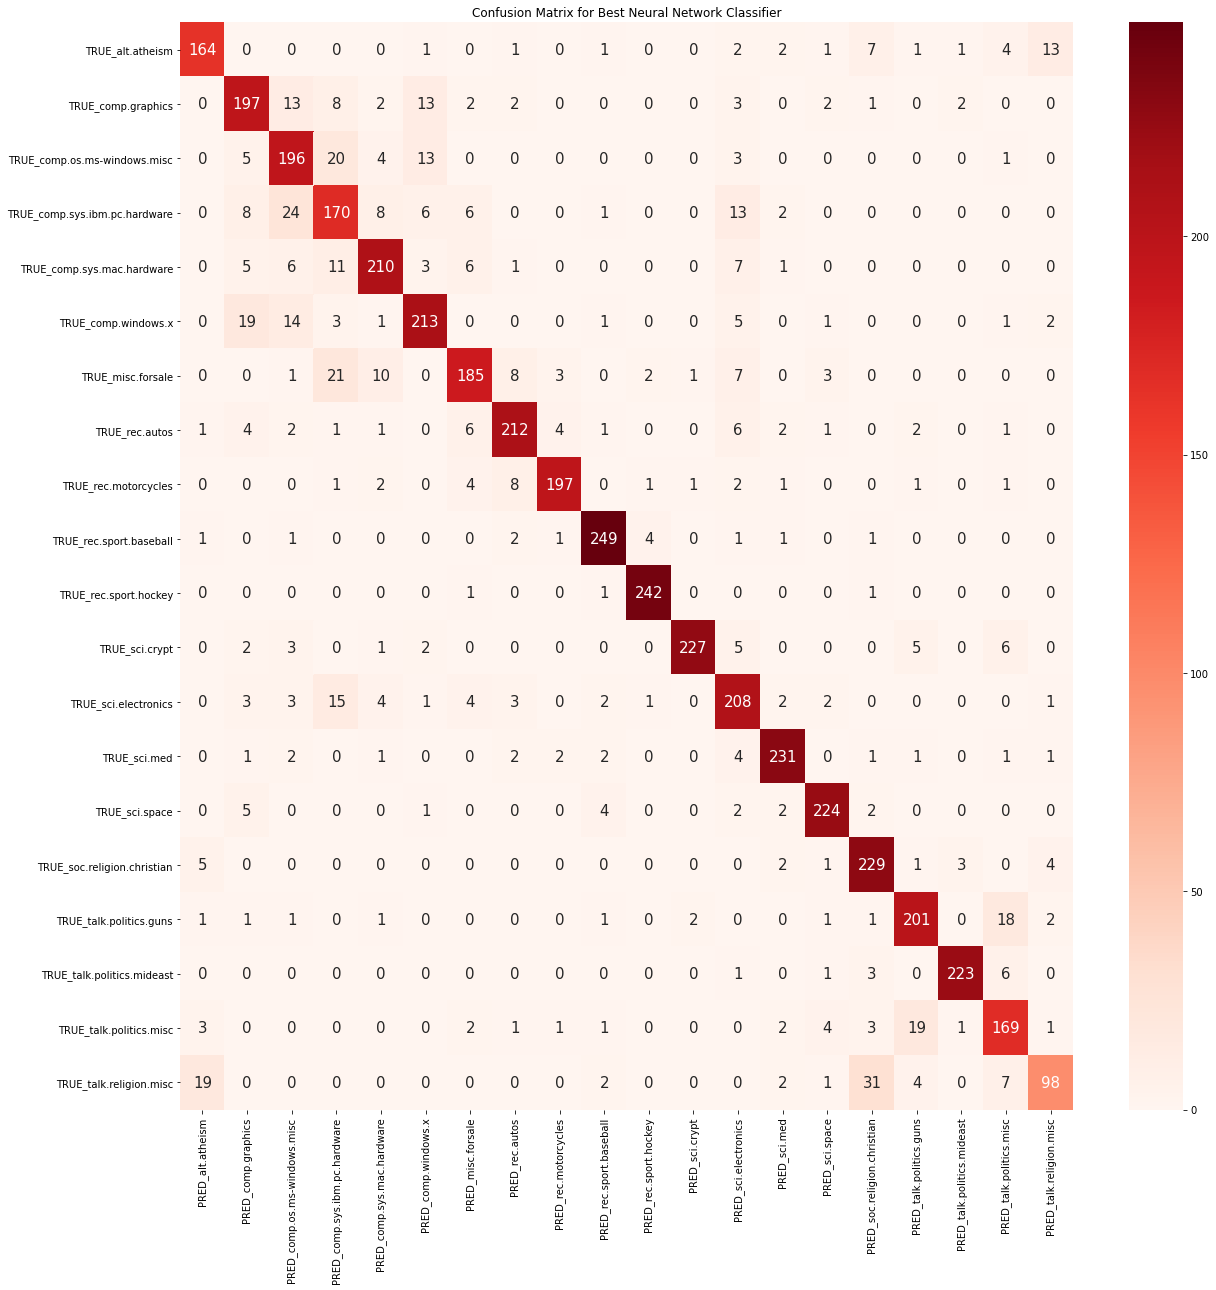

In [25]:
def multi_confusion_matrix(true,pred):
    cm = confusion_matrix(true,pred)
    df_cm = pd.DataFrame(
    cm,
    index = [f'TRUE_{name}' for name in target_name_dict],
    columns = [f'PRED_{name}' for name in target_name_dict])
    sns.heatmap(df_cm, annot=True,annot_kws={'size':15},cmap='Reds',fmt='g')

plt.figure(figsize=(20,20))
plt.title('Confusion Matrix for Best Neural Network Classifier')
multi_confusion_matrix(y_test_pos, pred_test)
print("accuracy: ", round(accuracy_score(y_test_pos, pred_test),4))
for scorer in [f1_score,precision_score,recall_score]:
    name = scorer.__name__
    print(f'{name}: {scorer(y_test_pos, pred_test,average="micro"):.4f}')
plt.savefig('confusion_matrix_nn.png')

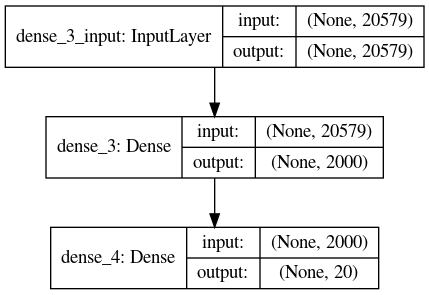

In [26]:

plot_model(model2, to_file='initial_nn.png', show_shapes=True, show_layer_names=True)

## Use pre-computed GloVe Vectors 

In [27]:
#number of dimensions in precomputed vectors. there are options with higher and lower dimensionality, I have
#chosen middle option

EMBEDDING_DIM = 100 

WORD_VECTOR_FILE = 'glove.6B.100d.txt' 

In [28]:
#load 400,000 word vector representations.

%pylab inline --no-import-all
embeddings_index = {}

with open(WORD_VECTOR_FILE) as stream:
    for line in stream:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        
    stream.close()

print('Found %s word vectors with dim=%s.' % (
    len(embeddings_index),
    next(iter(embeddings_index.values())).shape[0]
))

Populating the interactive namespace from numpy and matplotlib
Found 400000 word vectors with dim=100.


In [29]:
NUM_UNIQ_WORDS = 15000

tokenizer = Tokenizer(
    num_words=NUM_UNIQ_WORDS,
    lower=False,
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')

In [30]:
# only fit on training data
# so that texts_to_sequences will only be using the NUM_UNIQ_WORDS most frequent words!
tokenizer.fit_on_texts(X_train_pos)
print('Found %s unique tokens.' % len(tokenizer.word_index))


# generate "word index" vectors from both train and test
# (using only the NUM_UNIQ_WORDS most frequent ones)
seq_train = tokenizer.texts_to_sequences(X_train_pos)
seq_val = tokenizer.texts_to_sequences(X_val_pos)
seq_test = tokenizer.texts_to_sequences(X_test_pos)

Found 178947 unique tokens.


In [31]:
MAX_SEQ_LEN = 1000


data_train = pad_sequences(seq_train, maxlen=MAX_SEQ_LEN, truncating='post')
data_val = pad_sequences(seq_val, maxlen=MAX_SEQ_LEN, truncating='post')
data_test = pad_sequences(seq_test, maxlen=MAX_SEQ_LEN, truncating='post')

labels_train = y_train_nn_pos
labels_val = y_val_nn_pos
labels_test = y_test_nn_pos
print('Size of training set:', len(X_train_pos))
print('Shape of training data tensor:', data_train.shape)
print('Shape of training label tensor:', labels_train.shape)
print('\nSize of val set:', len(X_val_pos))
print('Shape of val data tensor:', data_val.shape)
print('Shape of val label tensor:', labels_val.shape)
print('\nSize of test set:', len(X_test_pos))
print('Shape of test data tensor:', data_test.shape)
print('Shape of test label tensor:', labels_test.shape)

Size of training set: 10600
Shape of training data tensor: (10600, 1000)
Shape of training label tensor: (10600, 20)

Size of val set: 3534
Shape of val data tensor: (3534, 1000)
Shape of val label tensor: (3534, 20)

Size of test set: 4712
Shape of test data tensor: (4712, 1000)
Shape of test label tensor: (4712, 20)


In [32]:
# generate the weight matrix for the connections between the input (the padded "document vector" sequences) and the embedding layer
# these weights will be the GloVe word embedding vectors one for each of the NUM_UNIQ_WORDS possible words we have.

num_uniq_input_words = min(NUM_UNIQ_WORDS, len(tokenizer.word_index))
embedding_matrix = np.zeros((num_uniq_input_words, EMBEDDING_DIM))

for word, i in tokenizer.word_index.items():
    if i == NUM_UNIQ_WORDS:
        break
        
    embedding_vector = embeddings_index.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    #else:
    #    # words not found in the index use all-zero vectors
#        print("not in index:", word)

In [33]:
#So this layer will expand the one-dimensional MAX_SEQ_LEN "document word index vectors" into MAX_SEQ_LEN times EMBEDDING_DIM matri

embedding_layer = Embedding(
    num_uniq_input_words,
    EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_SEQ_LEN,
    trainable=True)

In [34]:
# combine input tensor shape ("layer") and embedding layer together

sequence_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

In [35]:

x = embedded_sequences

for layer in [
    Conv1D(EMBEDDING_DIM, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(EMBEDDING_DIM, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(EMBEDDING_DIM, 5, activation='relu'),
    Dropout(0.2), 
    MaxPooling1D(35),
    Flatten(),
]:
    x = layer(x)
    print(layer.name,
          "input:", layer.input_shape,
          "- output:", layer.output_shape)

conv1d_1 input: (None, 1000, 100) - output: (None, 996, 100)

max_pooling1d_1 input: (None, 996, 100) - output: (None, 199, 100)
conv1d_2 input: (None, 199, 100) - output: (None, 195, 100)
max_pooling1d_2 input: (None, 195, 100) - output: (None, 39, 100)
conv1d_3 input: (None, 39, 100) - output: (None, 35, 100)
dropout_1 input: (None, 35, 100) - output: (None, 35, 100)
max_pooling1d_3 input: (None, 35, 100) - output: (None, 1, 100)
flatten_1 input: (None, 1, 100) - output: (None, 100)


In [36]:
n_cats = 20
preds = Dense(n_cats, activation='softmax')(x)

In [38]:
# place the layers into Keras model

model = Model(sequence_input, preds)
from keras import optimizers
adam = optimizers.adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         1500000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 100)          50100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 195, 100)          50100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 39, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 35, 100)           5010

In [ ]:
%%time

esc = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="embedding_model.hdf5", monitor='val_acc', verbose=1, save_best_only=True)


m3 = model.fit(data_train, labels_train,
          batch_size=32,
          epochs=500,
               callbacks = [esc,cp],
          validation_data=(data_val, labels_val))

Train on 10600 samples, validate on 3534 samples
Epoch 1/500
10600/10600 [==============================] - 10s 902us/step - loss: 1.8826 - acc: 0.3763 - val_loss: 1.1627 - val_acc: 0.6104

Epoch 00001: val_acc improved from -inf to 0.61036, saving model to embedding_model.hdf5
Epoch 2/500
10600/10600 [==============================] - 8s 727us/step - loss: 0.8724 - acc: 0.7119 - val_loss: 0.8616 - val_acc: 0.7272

Epoch 00002: val_acc improved from 0.61036 to 0.72722, saving model to embedding_model.hdf5
Epoch 3/500
10600/10600 [==============================] - 8s 728us/step - loss: 0.4591 - acc: 0.8565 - val_loss: 0.7270 - val_acc: 0.7827

Epoch 00003: val_acc improved from 0.72722 to 0.78268, saving model to embedding_model.hdf5
Epoch 4/500
10600/10600 [==============================] - 8s 727us/step - loss: 0.2358 - acc: 0.9283 - val_loss: 0.7716 - val_acc: 0.7762

Epoch 00004: val_acc did not improve from 0.78268
Epoch 5/500
10600/10600 [==============================] - 8s 727us

In [ ]:
plt.title('Accuracy')
plt.plot(m3.history['acc'], label='train')
plt.plot(m3.history['val_acc'], label='validation')
plt.legend()
plt.show();

In [ ]:
# Training Loss History
plt.title('Loss')
plt.plot(m3.history['loss'], label='train')
plt.plot(m3.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [ ]:

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)